<a href="https://colab.research.google.com/github/Lasitha99-star/Academic-Projects/blob/main/LSTM/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving househ.csv to househ.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['househ.csv']))
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.36
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
2075254,26/11/2010,20:58:00,0.946
2075255,26/11/2010,20:59:00,0.944
2075256,26/11/2010,21:00:00,0.938
2075257,26/11/2010,21:01:00,0.934


In [ ]:
df = df[898638:977344]
df


,Date,Time,Global_active_power
898638,31/8/2008,18:42:00,1.714
898639,31/8/2008,18:43:00,1.79
898640,31/8/2008,18:44:00,1.914
898641,31/8/2008,18:45:00,2.024
898642,31/8/2008,18:46:00,4.09
...,...,...,...
977339,25/10/2008,10:23:00,1.648
977340,25/10/2008,10:24:00,1.53
977341,25/10/2008,10:25:00,1.492
977342,25/10/2008,10:26:00,1.65


In [ ]:
df['Global_active_power'] = df['Global_active_power'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


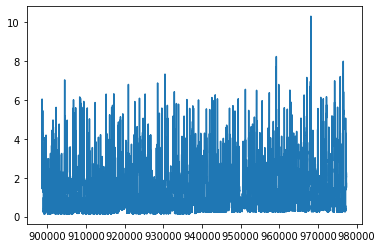

In [ ]:
power = df['Global_active_power']
power.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(power, WINDOW_SIZE)
X1.shape, y1.shape

((78701, 5, 1), (78701,))

In [ ]:
X_train1, y_train1 = X1[:65000], y1[:65000]
X_val1, y_val1 = X1[65000:70000], y1[65000:70000]
X_test1, y_test1 = X1[70000:], y1[70000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((65000, 5, 1), (65000,), (5000, 5, 1), (5000,), (8701, 5, 1), (8701,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
history=model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
2032/2032 [==============================] - 15s 6ms/step - loss: 0.0718 - root_mean_squared_error: 0.2679 - val_loss: 0.0913 - val_root_mean_squared_error: 0.3022
Epoch 2/20
2032/2032 [==============================] - 12s 6ms/step - loss: 0.0717 - root_mean_squared_error: 0.2679 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 3/20
2032/2032 [==============================] - 12s 6ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3083
Epoch 4/20
2023/2032 [============================>.] - ETA: 0s - loss: 0.0719 - root_mean_squared_error: 0.2681

2032/2032 [==============================] - 18s 9ms/step - loss: 0.0718 - root_mean_squared_error: 0.2679 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2942
Epoch 5/20
2030/2032 [============================>.] - ETA: 0s - loss: 0.0716 - root_mean_squared_error: 0.2676

2032/2032 [==============================] - 18s 9ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.0847 - val_root_mean_squared_error: 0.2910
Epoch 6/20
2032/2032 [==============================] - 12s 6ms/step - loss: 0.0715 - root_mean_squared_error: 0.2674 - val_loss: 0.0909 - val_root_mean_squared_error: 0.3014
Epoch 7/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0716 - root_mean_squared_error: 0.2675 - val_loss: 0.0879 - val_root_mean_squared_error: 0.2964
Epoch 8/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0715 - root_mean_squared_error: 0.2674 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2939
Epoch 9/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0715 - root_mean_squared_error: 0.2674 - val_loss: 0.0853 - val_root_mean_squared_error: 0.2920
Epoch 10/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0714 - root_mean_squared_error: 0.2673 - val_loss: 0.085

2032/2032 [==============================] - 18s 9ms/step - loss: 0.0714 - root_mean_squared_error: 0.2672 - val_loss: 0.0846 - val_root_mean_squared_error: 0.2909
Epoch 15/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0712 - root_mean_squared_error: 0.2669 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2942
Epoch 16/20
2032/2032 [==============================] - 14s 7ms/step - loss: 0.0712 - root_mean_squared_error: 0.2669 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2939
Epoch 17/20
2026/2032 [============================>.] - ETA: 0s - loss: 0.0713 - root_mean_squared_error: 0.2670

2032/2032 [==============================] - 19s 9ms/step - loss: 0.0713 - root_mean_squared_error: 0.2671 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 18/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0713 - root_mean_squared_error: 0.2670 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2926
Epoch 19/20
2030/2032 [============================>.] - ETA: 0s - loss: 0.0712 - root_mean_squared_error: 0.2668

2032/2032 [==============================] - 18s 9ms/step - loss: 0.0712 - root_mean_squared_error: 0.2668 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2884
Epoch 20/20
2032/2032 [==============================] - 13s 6ms/step - loss: 0.0711 - root_mean_squared_error: 0.2666 - val_loss: 0.0836 - val_root_mean_squared_error: 0.2892


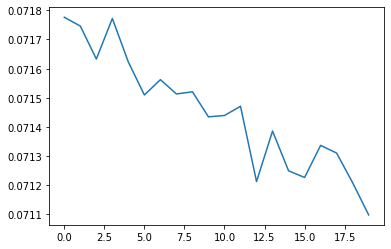

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2032/2032 [==============================] - 6s 3ms/step


,Train Predictions,Actuals
0,4.295504,3.932
1,3.668662,3.864
2,3.565673,5.048
3,4.902524,5.900
4,5.717935,6.036
...,...,...
64995,1.599196,2.100
64996,2.212341,2.312
64997,2.344513,2.042
64998,2.015062,2.044


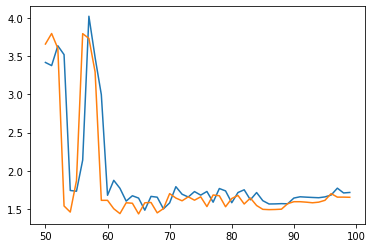

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,1.977933,1.394
1,1.492470,1.424
2,1.543920,1.414
3,1.528980,1.446
4,1.537199,1.482
...,...,...
4995,3.538218,3.916
4996,3.779898,4.304
4997,4.168832,2.502
4998,2.458104,3.392


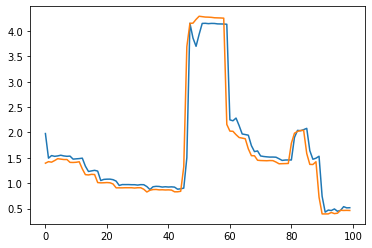

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

272/272 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,3.656211,3.672
1,3.588736,3.666
2,3.522439,3.682
3,3.590493,3.688
4,3.607311,3.684
...,...,...
8696,1.726667,1.648
8697,1.729368,1.530
8698,1.597540,1.492
8699,1.566417,1.650


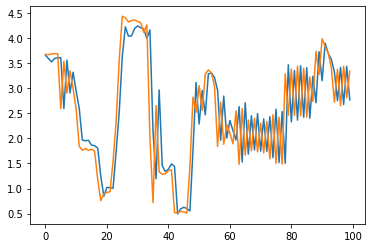

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])